In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib
dataset_path = "/content/drive/MyDrive/Colab Notebooks/NDWI Dataset"
data_dir = pathlib.Path(dataset_path)

In [3]:
batch_size = 32
img_height = 128
img_width = 128

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 85 files belonging to 2 classes.
Using 68 files for training.


In [5]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 85 files belonging to 2 classes.
Using 17 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['lakes', 'rivers']


In [7]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation((-0.01, 0.99), fill_mode='nearest', interpolation='bilinear'),
    layers.RandomZoom(height_factor=(0.01, 0.99), width_factor=(0.01, 0.99), fill_mode='nearest', interpolation='bilinear'),
    layers.RandomZoom(height_factor=(-0.01, -0.99), width_factor=(-0.01, -0.99), fill_mode='nearest', interpolation='bilinear'),
  ]
)

In [8]:
num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes)
])

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                  

In [11]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
3/3 [==============================] - 27s 2s/step - loss: 1.4760 - accuracy: 0.4118 - val_loss: 0.6222 - val_accuracy: 0.8824
Epoch 2/20
3/3 [==============================] - 1s 101ms/step - loss: 0.6527 - accuracy: 0.7500 - val_loss: 0.6647 - val_accuracy: 0.8235
Epoch 3/20
3/3 [==============================] - 1s 100ms/step - loss: 0.6352 - accuracy: 0.8235 - val_loss: 0.4997 - val_accuracy: 0.8824
Epoch 4/20
3/3 [==============================] - 1s 94ms/step - loss: 0.5541 - accuracy: 0.7353 - val_loss: 0.4366 - val_accuracy: 0.8824
Epoch 5/20
3/3 [==============================] - 1s 106ms/step - loss: 0.4866 - accuracy: 0.7647 - val_loss: 0.9976 - val_accuracy: 0.2353
Epoch 6/20
3/3 [==============================] - 1s 97ms/step - loss: 0.5230 - accuracy: 0.7206 - val_loss: 0.7226 - val_accuracy: 0.7059
Epoch 7/20
3/3 [==============================] - 1s 100ms/step - loss: 0.3567 - accuracy: 0.8824 - val_loss: 0.5026 - val_accuracy: 0.8235
Epoch 8/20
3/3 [========

In [12]:
model.save("/content/drive/MyDrive/Colab Notebooks/NDWI_Rivers_Lakes_Trained_Model.h5")

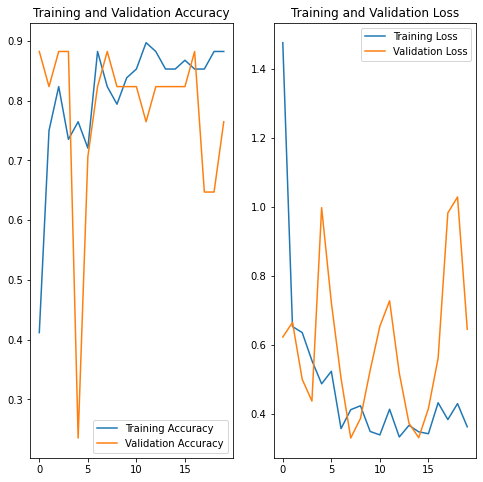

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [18]:
img = tf.keras.utils.load_img(
    "/content/drive/MyDrive/Colab Notebooks/NDWI Dataset/rivers/1.png", target_size=(128, 128)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to rivers with a 63.87 percent confidence.
